In [1]:
from loadFilteredData import *
#loading all data
origImg = loadAllTopicData('original')
gingham = loadAllTopicData('gingham')
clarendon = loadAllTopicData('clarendon')
juno = loadAllTopicData('juno')
lark = loadAllTopicData('lark')
gotham = loadAllTopicData('gotham')
reyes = loadAllTopicData('reyes')

['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)
['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)
['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphithe

In [7]:
def createDataPlaces(images, trainPercentage, validationPercentage):
    categories = len(images)

    imgList = []
    vectors = []

    testImgList = []
    testVectors = []

    valImgList = []
    valVectors = []
    

    #data for original image
    for c in range(categories):
        numImages = images[c].shape[0]
        print(numImages)
        numTrain = int(numImages * trainPercentage)
        numVal = int(numTrain * validationPercentage)
        
#         imgList.append(images[c][:numTrain - numVal])
        
#         valImgList.append(images[c][numTrain - numVal:numTrain])

#         featureVector = np.zeros((numTrain - numVal, categories))
#         featureVector[:, c] = 1
#         vectors.append(featureVector)
        
#         featureVector = np.zeros((numVal, categories))
#         featureVector[:, c] = 1
#         valVectors.append(featureVector)
    
        #testing data
        testImgList.append(images[c][numTrain:])

        featureVector = np.zeros((numImages - numTrain, categories))
        featureVector[:, c] = 1
        testVectors.append(featureVector)


    X = []
    y = []
    Xval = []
    yval = []
#     X = np.vstack(imgList)
#     y = np.vstack(vectors)

    Xtest = np.vstack(testImgList)
    ytest = np.vstack(testVectors)
    
#     Xval = np.vstack(valImgList)
#     yval = np.vstack(valVectors)

#     X, y = shuffle(X, y, random_state=0)
    Xtest, ytest = shuffle(Xtest, ytest, random_state=0)
#     Xval, yval = shuffle(Xval, yval, random_state=0)
    
    return X, y, Xtest, ytest, Xval, yval
X, y, Xtest, ytest, Xval, yval = createDataPlaces([origImg, clarendon, gingham, juno, lark, gotham, reyes], .9, .005)
# X, y, Xtest, ytest, Xval, yval = createDataPlaces([origImg, juno], .9, .005)

9000
9000
9000
9000
9000
9000
9000


In [5]:
print(X.shape, y.shape)
print(Xtest.shape, ytest.shape)
print(Xval.shape, yval.shape)

(56420, 128, 128, 3) (56420, 7)
(6300, 128, 128, 3) (6300, 7)
(280, 128, 128, 3) (280, 7)


In [12]:
def splitImg(X, y):
    Xsmall = []
    ysmall = []
    for i in range(X.shape[0]):
        l = 0
        for j in range(0, X.shape[1], X.shape[1] // 4):
            for k in range(0, X.shape[1], X.shape[1] // 4):
                block = X[i, j : j + 32, k : k + 32]
                Xsmall.append(block)
                ysmall.append(y[i])
                l += 1
    Xsmall = np.array(Xsmall)
    ysmall = np.array(ysmall)
    return Xsmall, ysmall

In [9]:
Xsmall, ysmall = splitImg(X, y)
Xval_small, yval_small = splitImg(Xval, yval)

In [11]:
print(Xsmall.shape, ysmall.shape)
print(Xval_small.shape, yval_small.shape)

(902720, 32, 32, 3) (902720, 7)
(4480, 32, 32, 3) (4480, 7)


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), strides=2))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(32, (3, 3), strides = 2))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=3, strides =2))
model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.3))
# model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [56]:
model.fit(Xsmall, ysmall, epochs=5, batch_size=4096, validation_data=(Xval_small, yval_small))

Train on 902720 samples, validate on 4480 samples
Epoch 1/5
902720/902720 [==============================] - 46s 50us/step - loss: 0.3736 - acc: 0.8555 - val_loss: 0.4064 - val_acc: 0.8391
Epoch 2/5
902720/902720 [==============================] - 45s 50us/step - loss: 0.3853 - acc: 0.8518 - val_loss: 0.3745 - val_acc: 0.8500
Epoch 3/5
902720/902720 [==============================] - 46s 51us/step - loss: 0.3693 - acc: 0.8573 - val_loss: 0.3827 - val_acc: 0.8484
Epoch 4/5
902720/902720 [==============================] - 47s 52us/step - loss: 0.3759 - acc: 0.8545 - val_loss: 0.3990 - val_acc: 0.8424
Epoch 5/5
902720/902720 [==============================] - 46s 51us/step - loss: 0.3658 - acc: 0.8582 - val_loss: 0.3927 - val_acc: 0.8433


In [13]:
Xtest_small, ytest_small = splitImg(Xtest, ytest)

In [14]:
predict = model.predict(Xtest_small)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest_small.argmax(axis=1), predict.argmax(axis=1)))
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest_small.argmax(axis=1), predict.argmax(axis=1)))
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(ytest_small.argmax(axis=1), predict.argmax(axis=1))

[[12313   806   265   194   231   377   214]
 [ 1281 11754    73   101   121   763   307]
 [   52    11 14169     9    13    62    84]
 [  193    97   108 11139  2564   176   123]
 [  338   163   100  3534  9964   109   192]
 [  197   592   100   153    27 13285    46]
 [ 1104   284   619   199   153   129 11912]]
0.8386507936507936


(array([0.79551622, 0.85751806, 0.9180381 , 0.72666188, 0.7621816 ,
        0.8915509 , 0.92498835]),
 array([0.85506944, 0.81625   , 0.98395833, 0.77354167, 0.69194444,
        0.92256944, 0.82722222]),
 array([0.82421849, 0.83637528, 0.94985587, 0.7493693 , 0.72536672,
        0.90679499, 0.87337781]),
 array([14400, 14400, 14400, 14400, 14400, 14400, 14400], dtype=int64))

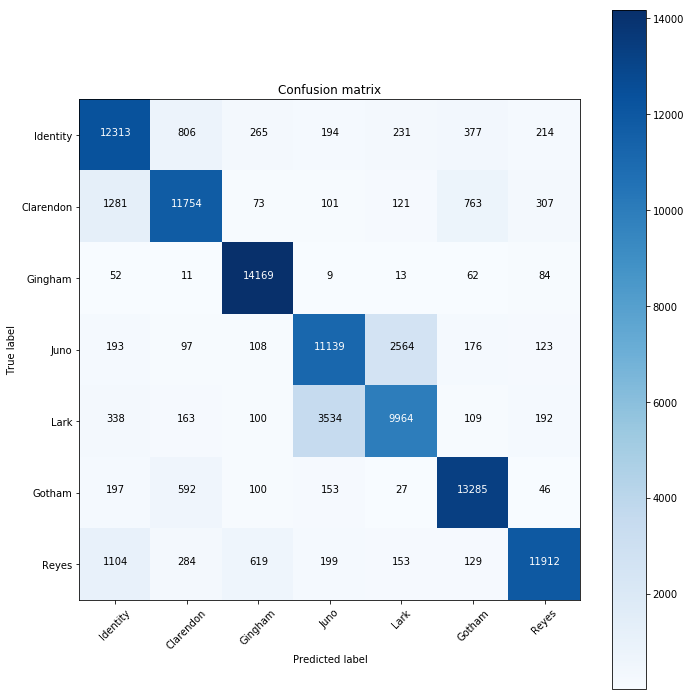

In [21]:
import itertools
#Taken from sklearn
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # if normalize:
    #     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     print("Normalized confusion matrix")
    # else:
    #     print('Confusion matrix')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(ytest_small.argmax(axis=1), predict.argmax(axis=1))
np.set_printoptions(precision=2)

class_names = ["Identity", "Clarendon", "Gingham", "Juno", "Lark", "Gotham", "Reyes"]
# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

In [22]:
from scipy.stats import mode
predictOrig = []
print(predict.shape)
for i in range(0, predict.shape[0], 16):
    votes = np.argmax(predict[i: i+16], axis=1)
    vote = mode(votes)
    predictOrig.append(vote[0])
predictOrig = np.array(predictOrig)

(100800, 7)


In [23]:
print(ytest.shape)
print(predictOrig.shape)

(6300, 7)
(6300, 1)


In [24]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
predictVote = onehot_encoder.fit_transform(predictOrig)
print(predictVote.shape)

(6300, 7)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest.argmax(axis=1), predictVote.argmax(axis=1)))
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest.argmax(axis=1), predictVote.argmax(axis=1)))
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(ytest.argmax(axis=1), predictVote.argmax(axis=1))

[[879   4   8   1   2   6   0]
 [ 15 869   1   0   0  11   4]
 [  0   0 900   0   0   0   0]
 [  1   0   3 857  38   0   1]
 [  5   1   4 156 732   1   1]
 [  0   2   0   1   0 897   0]
 [  9   0   8   0   0   1 882]]
0.954920634920635


(array([0.97, 0.99, 0.97, 0.84, 0.95, 0.98, 0.99]),
 array([0.98, 0.97, 1.  , 0.95, 0.81, 1.  , 0.98]),
 array([0.97, 0.98, 0.99, 0.9 , 0.88, 0.99, 0.99]),
 array([900, 900, 900, 900, 900, 900, 900], dtype=int64))

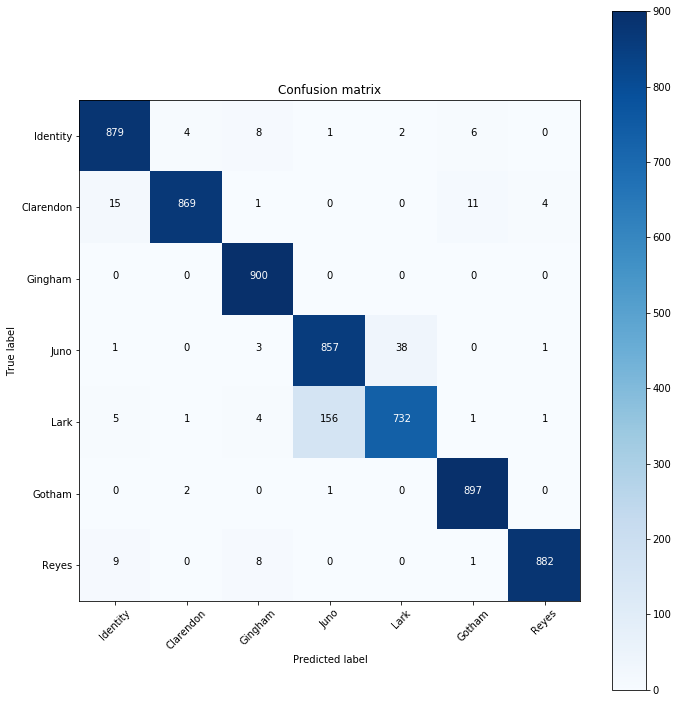

In [28]:
cnf_matrix = confusion_matrix(ytest.argmax(axis=1), predictVote.argmax(axis=1))
np.set_printoptions(precision=2)

class_names = ["Identity", "Clarendon", "Gingham", "Juno", "Lark", "Gotham", "Reyes"]
# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

In [9]:
from keras.models import load_model
#model.save('FullNNFilter4.h5')

Using TensorFlow backend.


In [10]:
model = load_model('FullNNFilter3.h5')